<a href="https://colab.research.google.com/github/Venkatigi/basic-nn-model/blob/main/DeepLearning_Ex_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Accessing Google Drive

In [28]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

In [29]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [30]:
worksheet = gc.open('Dataset 1.0').sheet1

In [31]:
rows = worksheet.get_all_values()

In [32]:
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'Input':'float'})
df = df.astype({'Output':'float'})
df.head()

,Input,Output
0,1.0,11.0
1,2.0,21.0
2,3.0,31.0
3,4.0,41.0
4,5.0,51.0


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [35]:
x=df[['Input']].values
y=df[['Output']].values

In [36]:
x

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 9.],
       [10.],
       [12.],
       [15.],
       [17.],
       [20.],
       [25.],
       [29.],
       [39.],
       [32.],
       [34.],
       [35.]])

In [37]:
y

array([[ 11.],
       [ 21.],
       [ 31.],
       [ 41.],
       [ 51.],
       [ 61.],
       [ 71.],
       [ 91.],
       [101.],
       [121.],
       [151.],
       [171.],
       [201.],
       [251.],
       [291.],
       [301.],
       [321.],
       [341.],
       [351.]])

In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [39]:
scaler=MinMaxScaler()
scaler.fit(xtrain)

MinMaxScaler()

In [40]:
xtrain1=scaler.transform(xtrain)

In [41]:
model_1_0=Sequential([
    Dense(82,activation='relu'),
    Dense(1034,activation='relu'),
    Dense(14,activation='relu'),
    Dense(1)
])

In [42]:
model_1_0.compile(optimizer='rmsprop',loss='mse')

In [43]:
model_1_0.fit(xtrain1,ytrain,epochs=5000)

Streaming output truncated to the last 5000 lines.
Epoch 2078/5000
1/1 [==============================] - 0s 9ms/step - loss: 4.9292
Epoch 2079/5000
1/1 [==============================] - 0s 7ms/step - loss: 4.7765
Epoch 2080/5000
1/1 [==============================] - 0s 11ms/step - loss: 4.9290
Epoch 2081/5000
1/1 [==============================] - 0s 10ms/step - loss: 4.7765
Epoch 2082/5000
1/1 [==============================] - 0s 12ms/step - loss: 4.9291
Epoch 2083/5000
1/1 [==============================] - 0s 14ms/step - loss: 4.7766
Epoch 2084/5000
1/1 [==============================] - 0s 8ms/step - loss: 4.9292
Epoch 2085/5000
1/1 [==============================] - 0s 9ms/step - loss: 4.7766
Epoch 2086/5000
1/1 [==============================] - 0s 8ms/step - loss: 4.9292
Epoch 2087/5000
1/1 [==============================] - 0s 9ms/step - loss: 4.7766
Epoch 2088/5000
1/1 [==============================] - 0s 8ms/step - loss: 4.9291
Epoch 2089/5000
1/1 [======================

In [44]:
loss=pd.DataFrame(model_1_0.history.history)

<AxesSubplot:>

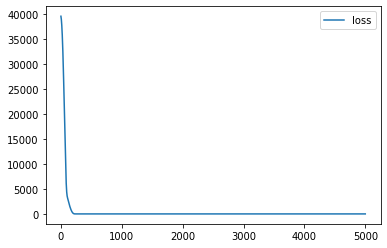

In [45]:
loss.plot()

In [46]:
xtest1=scaler.transform(xtest)

In [47]:
model_1_0.evaluate(xtest1,ytest)

1/1 [==============================] - 0s 182ms/step - loss: 1472.2352


1472.2352294921875

In [48]:
xn1=[[4]]

In [49]:
xn1_1=scaler.transform(xn1)

In [50]:
model_1_0.predict(xn1_1)

1/1 [==============================] - 0s 121ms/step


array([[41.88757]], dtype=float32)